In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_boston()
#data
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df["MEDV"]=data.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop(columns="MEDV",axis=1)
Y = df["MEDV"]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [6]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


<AxesSubplot:>

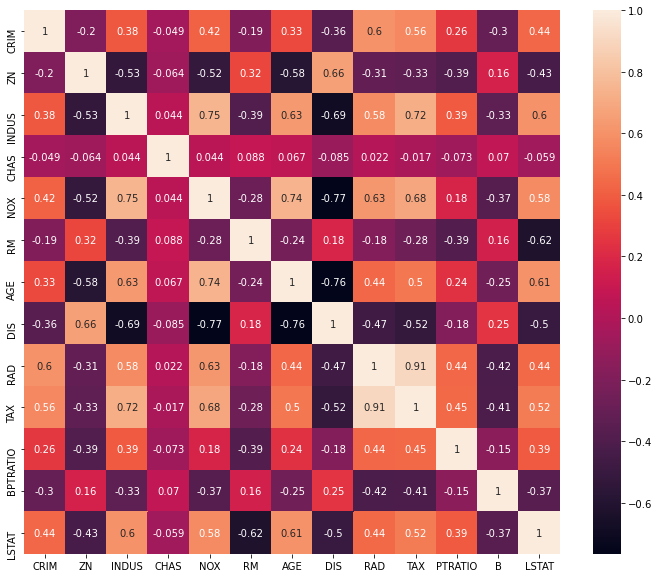

In [7]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [8]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

1

In [10]:
corr_features

{'TAX'}

In [11]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,18.4,396.90,4.54


In [34]:
df = pd.read_csv("train.csv",nrows=10000)

In [35]:
df.shape

(10000, 371)

In [36]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [37]:
X = df.drop("TARGET",axis=1)
Y = df["TARGET"]
print(X.shape,Y.shape)

(10000, 370) (10000,)


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_test,Y_train = train_test_split(X,Y,test_size=0.3,random_state=0)

In [39]:
X_train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,0.003868,-0.007921,0.026313,0.010195,0.003226,-0.001037,-0.008416,0.009563,0.001776,...,-0.016729,-0.015758,-0.010380,-0.013348,-0.012468,-0.004889,0.008355,-0.010153,-0.007876,-0.003619
var3,0.003868,1.000000,-0.009840,0.000892,0.004527,0.004604,0.000984,0.001146,0.000417,0.000477,...,0.000247,0.000412,0.000428,0.000433,0.000452,0.000570,0.000337,0.000671,0.000669,-0.000065
var15,-0.007921,-0.009840,1.000000,0.033884,0.117646,0.124938,0.059411,0.074257,0.018217,0.019172,...,0.019788,0.026903,0.024832,0.027281,0.027676,0.022812,0.031673,0.024141,0.023195,-0.005522
imp_ent_var16_ult1,0.026313,0.000892,0.033884,1.000000,0.017469,0.015492,0.010331,0.007650,-0.000866,-0.000991,...,0.037854,-0.000822,-0.000812,-0.000867,-0.000899,-0.001184,-0.000700,-0.001394,-0.001391,0.001352
imp_op_var39_comer_ult1,0.010195,0.004527,0.117646,0.017469,1.000000,0.877170,0.506263,0.455786,0.052864,0.068169,...,0.016903,0.017639,0.044972,0.024841,0.032876,-0.001352,-0.003516,0.000278,0.000051,0.006273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.004889,0.000570,0.022812,-0.001184,-0.001352,0.001320,-0.001268,-0.001421,-0.000555,-0.000636,...,-0.000329,-0.000527,-0.000521,-0.000556,-0.000576,1.000000,0.617695,0.920544,0.933605,0.000002
saldo_medio_var44_hace3,0.008355,0.000337,0.031673,-0.000700,-0.003516,0.000460,-0.000750,-0.000840,-0.000328,-0.000376,...,-0.000195,-0.000312,-0.000308,-0.000329,-0.000341,0.617695,1.000000,0.521398,0.474861,-0.004989
saldo_medio_var44_ult1,-0.010153,0.000671,0.024141,-0.001394,0.000278,0.000916,-0.001492,-0.001672,-0.000654,-0.000748,...,-0.000388,-0.000621,-0.000613,-0.000655,-0.000679,0.920544,0.521398,1.000000,0.983012,-0.000798
saldo_medio_var44_ult3,-0.007876,0.000669,0.023195,-0.001391,0.000051,0.000364,-0.001489,-0.001669,-0.000652,-0.000747,...,-0.000387,-0.000620,-0.000612,-0.000653,-0.000677,0.933605,0.474861,0.983012,1.000000,0.000160


<AxesSubplot:>

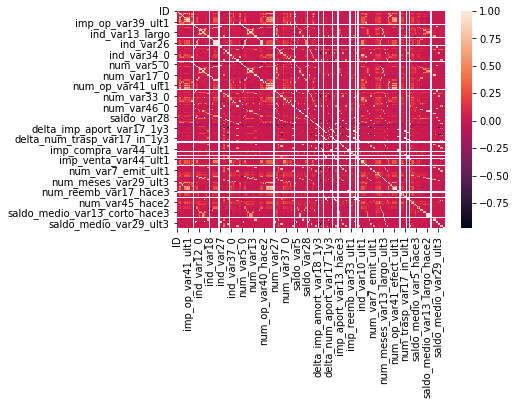

In [40]:
import seaborn as sns 
plt.Figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr)

In [41]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [43]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [46]:
X_train=X_train.drop(corr_features,axis=1)

In [48]:
X_train.shape

(7000, 214)